In [15]:
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

climate = bpd.read_csv('../../data/climate.csv')

# Scatter Plots

{dterm}`Scatter plots` are useful for quickly understanding the relationship between two numerical variables. For example: are monthly rainfall and temperature associated? Does it tend to rain more when it is warm? If there is an association between these variables, the scatter plot will make it very clear.

To create a scatter plot, we first identify two numerical variables whose relationship we'd like to explore.  We then decide on which variable should be called the "x" variable and which should be called the "y" variable; sometimes there is no natural reason to prefer one over the other, so we make an arbitrary choice. We then create a plot by making a single dot for each individual in our data set, using the "x" variable as the dot's x-coordinate, and the "y" variable as the dot's y-coordinate.

For instance, let's create a scatter plot which shows the relationship between rainfall and the Z Index. To create a scatter plot with babypandas, we use the `.plot()` method. We tell the method which type of plot to make (a scatter plot) along with the names of the columns that we'd like to use as the "x" and "y" variables.

<AxesSubplot:xlabel='rainfall', ylabel='zndx'>

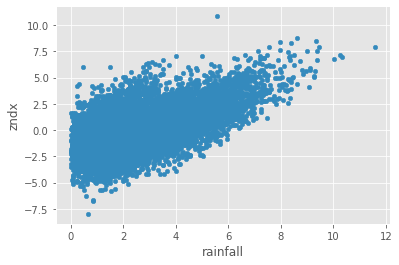

In [16]:
climate.plot(kind='scatter', x='rainfall', y='zndx')

 Recall that the Z Index measures drought conditions, with a large negative number representing a severe drought. As such, we expect these two variables to have a strong *positive* association: as rainfall increases, so should the Z Index. And indeed, this is what we find.
 
Note that if we had chosen rainfall to be our "x" variable, and the Z Index to be our "y" variable, we would get a different plot -- but we would still see an increasing trend!

<AxesSubplot:xlabel='zndx', ylabel='rainfall'>

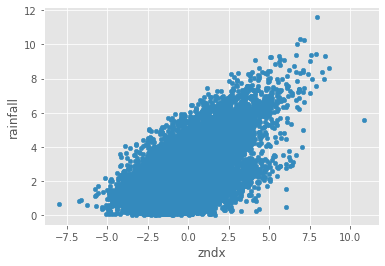

In [17]:
climate.plot(kind='scatter', x='zndx', y='rainfall')

Now let's look at the relationship between temperature and rainfall. Before we create the plot, it is useful to hypothesize what we'll see. Does rainfall increase with temperature? Or is it the opposite true. Let's take a look:

<AxesSubplot:xlabel='temperature', ylabel='rainfall'>

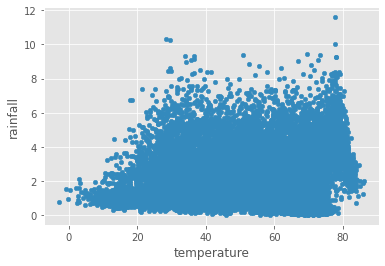

In [18]:
climate.plot(kind='scatter', x='temperature', y='rainfall')

There doesn't seem to be much of an association. If anything, it looks like there is a slight downward trend, so that as temperature increases, rainfall decreases. But the points of the scatter chart are so close together that they overlap, making the plot look like one big blob. There are two things we can do to make this situation better. First, we can make the plot larger using the `figsize=(<width>, <height>)` keyword argument. Second, we can make each dot slightly transparent using the `alpha=<opacity>` keyword argument, where the opacity should be a number between 0 (completely see-through) and 1 (opaque). Here's an example of these arguments in action:

<AxesSubplot:xlabel='temperature', ylabel='rainfall'>

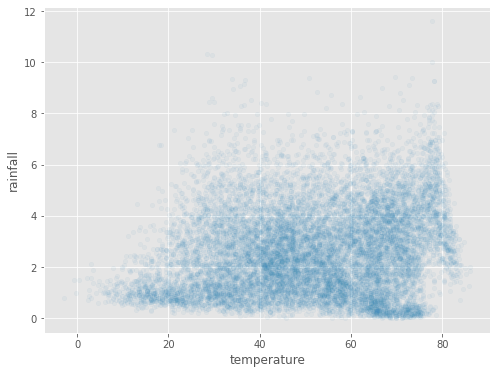

In [23]:
climate.plot(kind='scatter', x='temperature', y='rainfall', figsize=(8,6), alpha=.05)

While this makes the plot easier to interpret, we're still not seeing a clear association between these variables. If anything, we might concluded that there *might* be a slighly negative association between temperature and rainfall, so that rain is slightly more likely when the temperature is low.

## Misleading visualizations

What can we conclude from our last scatter plot? It looks like there isn't much of a relationship between temperature and rainfall. But it would be a mistake to take this conclusion and apply it to, say, Minnesota -- as people who live there know, the hottest months also bring torrential rainfall.

In this sense, our visualization above is **misleading**. One might use the plot to conclude that rain and temperature are not associated *in general*, but this isn't the case. For instance, let's make the same visualization, but using data from the Upper Midwest only. We can do so with a query:

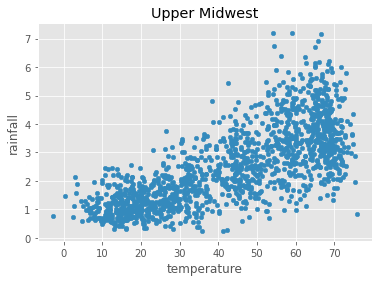

In [20]:
(
    climate[climate.get('region') == 'Upper Midwest Climate Region']
    .plot(kind='scatter', x='temperature', y='rainfall', title='Upper Midwest')
);

Well, that's a very different plot! This plot shows a clear positive association between temperature and rainfall. Similarly, if we plot only the data from the West region, we'll see a clear *negative* association, which tells us that most rainfall occurs in the cooler months.

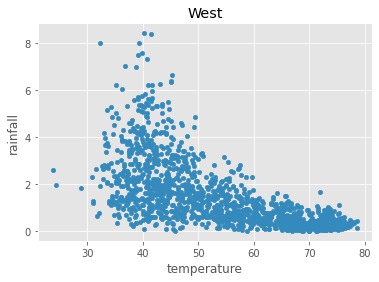

In [21]:
(
    climate[climate.get('region') == 'West Climate Region']
    .plot(kind='scatter', x='temperature', y='rainfall', title='West')
);

In short, our table contains data from diverse regions which have their own weather patterns. Plotting them together in one scatter plot can be misleading, since we aren't seeing one overall trend, but an amalgamation of many regional trends.

In fact, if we color each dot in the original scatter plot according to the region it comes from and re-plot our original graph, we see a patchwork pattern of different trends:

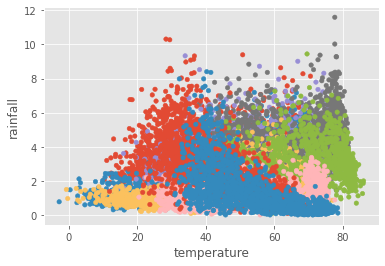

In [22]:
regions = list(climate.get('region').unique())

def to_color(s):
    return f'C{regions.index(s)}'

with_colors = climate.assign(
    color=climate.get('region').apply(to_color)
)

(
    with_colors
    .plot(kind='scatter', x='temperature', y='rainfall', c='color')
);

This isn't a problem specific to scatter plots -- *all* visualizations have the potential to mislead. As data scientists, it is our job to be critical of statistics and visualizations, including our own. Always ask: can this plot be misleading? What can I really conclude from this visualization?

```{hiddenanswer}
---
question: While our regional plots are better, they still might be misleading. How so?
answer: |
     The regional plots can be misleading for the same reason that the original plot was misleading: a region may combine several sub-regions, each with their own climate patterns.
```